<a href="https://colab.research.google.com/github/dablro12/AI_study/blob/main/Lab02_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#import moduel config
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#google drive <-> colab mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
#pandas dataframe 불러오기
EXCEL_PATH = '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/0327/data0327.xlsx'
df = pd.read_excel(EXCEL_PATH)
df.head()

,취미,운동,공부,수면,오늘기분
0,8.0,0.0,2.0,12.0,0.0
1,3.0,0.0,3.0,7.0,1.0
2,1.0,0.0,5.0,7.0,1.0
3,2.0,1.0,6.0,8.0,3.0
4,3.0,2.0,2.0,7.0,5.0


In [78]:
#y = X * w + b 에서 가져올 x, y 정의
#x는 취미,운동,공부,수면 data를 가져와야함
x_class=df[['취미','운동','공부','수면']]
y_class=df[['오늘기분']]
#X,Y를 tensor형태로 바꿔줌 .to_numpy() -> df에 있는 값들은 데이터프레임을 numpy array로 변환시켜주는 method
##x는 취미,운동,공부,수면을 가져와야함
X = torch.tensor(x_class.to_numpy()).to(torch.float)
##y는 오늘기분 data를 가져와야함
Y = torch.tensor(y_class.to_numpy()).to(torch.float)
print(f"x shape : {X.shape}, y shape : {Y.shape}, x dtype : {X.dtype}, y dtype : {Y.dtype}")

# w(가중치)에 대한 tensor형태를 정의해줘야함 -> 1차원 텐서로  
w = torch.ones(4, requires_grad = True) #requires_grad = True, 가중치를 업데이트해줘야하므로 True로 설정
print(f"w shape : {w.shape}, w dtype : {w.dtype}")

# b(bias)는 0차원 텐서(스칼라값으로 부여해주기) 
b = torch.ones(1, requires_grad = True) #b도 게속 업데이트되어야하므로 True로 설정
print(f"b shape : {b.shape}, b dtype : {b.dtype}")

#Hypter parameter config 
batch_size = len(X)/4 #-> MINI = 데이터크기/N해줘야함
l_rate = 0.001 #Learning Rate 설정 0.001로 설정



x shape : torch.Size([33, 4]), y shape : torch.Size([33, 1]), x dtype : torch.float32, y dtype : torch.float32
w shape : torch.Size([4]), w dtype : torch.float32
b shape : torch.Size([1]), b dtype : torch.float32


In [79]:
#(linear regression, loss function, optim algorithms) 함수 정의
#-1. linear regression define : y = X * w + b 형태로
def lin_reg(X, w, b):
  Y = torch.matmul(X,w) + b #X, w가 텐서형태이므로 행렬곱을 해줌 b는 스칼라값이므로 np.dot 쓰면 안됨 정방행렬이 아님! 
  return Y #-> 0차원 33개 요소를 가지는 텐서
#np.dot() vs torch.mm()의 차이점을 알고 싶다면 링크 확인 : https://jimmy-ai.tistory.com/104

#-2. loss function define : squared loss 사용 -> (y_hat - y)^2 / 2
def squared_loss(y_hat, y):
  loss = (y_hat - y.reshape(y_hat.shape))**2 / 2
  return loss

#-3. optim algorithms define : 학습 알고리즘 어떻게할건지
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for p in params:
      p -= lr * p.grad/batch_size
      p.grad.zero_() #파라미터를 다시 0의 값으로 놔두기 , _는 p를 inplace 하기위함

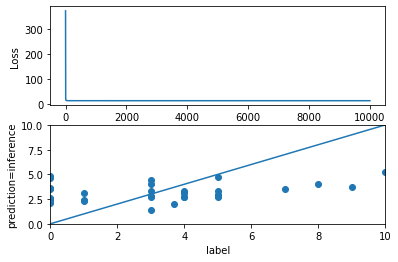

weight 확인 : tensor([-0.0628,  0.6060,  0.2925,  0.1259], requires_grad=True)
bais 값 확인 : tensor([0.8107], requires_grad=True)


In [80]:
#학습 모델 돌리기
loss_train = [] #학습하면서 loss값이 어떻게 변화하는지 확인하기 위해 리스트를 하나 만듬
for l_cnt in range(0,10000):
  y_hat = lin_reg(X,w,b)
  loss = squared_loss(y_hat, Y)
  loss_train.append(loss.sum().detach()/batch_size)
  loss.sum().backward()
  sgd([w,b], l_rate, batch_size)

plt.subplot(211)
plt.plot(loss_train)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.subplot(212)
plt.scatter(Y,y_hat.detach().numpy())
plt.plot(np.arange(0,11),np.arange(0,11))
plt.axis([0,10,0,10])
plt.xlabel('label')
plt.ylabel('prediction=inference')
plt.show()

print(f"weight 확인 : {w}")
print(f"bais 값 확인 : {b}")


In [81]:
#예측값 맞는지 한 번 확인해보기
for i in range(len(X)):
  y_hat=lin_reg(X[i],w,b)
  print(f"y : {Y[i].item()}, y_hat : {y_hat.item()}") 

y : 0.0, y_hat : 2.4036877155303955
y : 1.0, y_hat : 2.380783796310425
y : 1.0, y_hat : 3.0913209915161133
y : 3.0, y_hat : 4.052813529968262
y : 5.0, y_hat : 3.3002426624298096
y : 5.0, y_hat : 2.71639347076416
y : 5.0, y_hat : 2.8621983528137207
y : 5.0, y_hat : 4.72158145904541
y : 1.0, y_hat : 2.294238567352295
y : 3.0, y_hat : 2.861933708190918
y : 3.0, y_hat : 1.3777862787246704
y : 0.0, y_hat : 3.4889321327209473
y : 5.0, y_hat : 2.946045398712158
y : 0.0, y_hat : 4.658773422241211
y : 0.0, y_hat : 4.867695331573486
y : 3.0, y_hat : 4.4275078773498535
y : 0.0, y_hat : 2.0880589485168457
y : 0.0, y_hat : 2.2977874279022217
y : 0.0, y_hat : 2.505329132080078
y : 4.0, y_hat : 3.3420119285583496
y : 4.0, y_hat : 2.6615209579467773
y : 3.700000047683716, y_hat : 1.9642035961151123
y : 4.0, y_hat : 3.1126246452331543
y : 3.0, y_hat : 3.363050937652588
y : 4.0, y_hat : 2.6742053031921387
y : 3.0, y_hat : 2.6929473876953125
y : 5.0, y_hat : 2.9247419834136963
y : 10.0, y_hat : 5.2218480

# 결과분석
## -> 잘안맞다. 예측값과 GT사이의 값들은 너무 많이 차이가 난다. input data가 noise가 많아 보이는데, 이것도 맞출 수 있으면 얼마나 좋을까